In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
from numba import jit

In [2]:
x_dim = 2 # dimension of observations
num_MBONS = 1
freqs = [0.5, 0.5]
mus = []

for i in range(num_MBONS+1):
    mus.append(5*np.random.randn(x_dim,1))
    
sig = np.random.randn(x_dim,x_dim)/np.sqrt(x_dim)
Sigma = sig@sig.T
samples = 1000 # number of data points

In [3]:
mus = [np.array([[10],[0]]), np.array([[0],[10]])]

In [4]:
classes = []
for i in range(num_MBONS+1):
    classes.append(mus[i] + np.random.randn(x_dim,int(samples*freqs[i])))

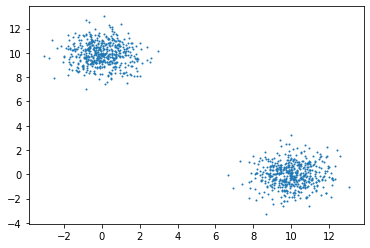

In [5]:
X = np.concatenate(classes, axis=1)
plt.scatter(X[0],X[1],s=1)
plt.show()

## Hard Clustering

In [7]:
num_clusters = 2
W = np.random.randn(num_clusters,x_dim)
theta = np.zeros((num_clusters,1))
n = np.ones((num_clusters,1))
Y = np.zeros((num_clusters,samples))
eta = .1
rho = 5
idx = np.random.permutation(samples)
neural = True
for t in tqdm(range(samples)):
    
    #Initializing Variables

    x = X[:,idx[t]].reshape((x_dim,1))

    a = -W@x + theta
    y = np.zeros((num_clusters,1))
    z = 0

    if neural: ## Neural Step 3
        
        er  = 1
        itr = 1
        
        # Iterate until convergence
        while er > 1e-7:
        
            z_prev = z
            y_prev = y
            
            # Update y and z
            y = np.maximum( 0, y + (eta)*( -a - z - rho*(np.sum(y) - 1) ) );
            z += eta*( np.sum(y) - 1 )
            
            er = max(np.linalg.norm(z_prev-z)/(np.linalg.norm(z_prev)+1e-4),
                     np.linalg.norm(y_prev-y)/(np.linalg.norm(y_prev)+1e-4))
            itr += 1
        
    else: ## Non=Neural Step 3
        c = np.argmin(a)
        y[c] = 1
        z = -a[c]

    #Step 4
    
    n += y

    for i in range(num_clusters):
        for j in range(x_dim):
            W[i,j] += y[i]*(2*x[j] - W[i,j])/n[i]

        theta[i] += y[i]*(z - theta[i])/n[i]

    for j in range(num_clusters):
        Y[j,idx[t]] = y[j]

print(f'Cluster 1 mean: {W[0,:]/2}')
print(f'Cluster 2 mean: {W[1,:]/2}')

100%|██████████| 1000/1000 [00:40<00:00, 24.44it/s]

Cluster 1 mean: [10.0076029 -0.0404493]
Cluster 2 mean: [0.03538942 9.87316883]


## Soft Clustering

In [9]:
num_clusters = 2
W = np.random.randn(num_clusters,x_dim)
theta = np.zeros((num_clusters,1))
n = np.ones((num_clusters,1))
Y = np.zeros((num_clusters,samples))
eta = .1
rho = 5
idx = np.random.permutation(samples)
neural = True
alpha = 10**-2.5
for t in tqdm(range(samples)):
    
    #Initializing Variables
    x = X[:,idx[t]].reshape((x_dim,1))

    a = -W@x + theta
    y = np.zeros((num_clusters,1))
    z = 0

    if neural: ## Neural Step 3
        
        er  = 1
        itr = 1
        
        # Iterate until convergence
        while er > 1e-7:
        
            z_prev = z
            y_prev = y
            
            # Update y and z
            
            y = np.maximum( 0, y + (eta)*(-alpha*t*y/n -a - z - rho*np.maximum(0,np.sum(y) - 1)) );
            z += eta*np.maximum(0,np.sum(y) - 1)
            
            
            er = max(np.linalg.norm(z_prev-z)/(np.linalg.norm(z_prev)+1e-4),
                     np.linalg.norm(y_prev-y)/(np.linalg.norm(y_prev)+1e-4))
            itr += 1
        
    else: ## Non-Neural Step 3
        c = np.argmin(a)
        y[c] = 1
        z = -a[c]
    
    ## Step 4
    n += y

    for i in range(num_clusters):
        for j in range(x_dim):
            W[i,j] += y[i]*(2*x[j] - W[i,j])/n[i]

        theta[i] += y[i]*(z - theta[i])/n[i]

    for j in range(num_clusters):
        Y[j,idx[t]] = y[j]

print(f'Cluster 1 mean: {W[0,:]/2}')
print(f'Cluster 2 mean: {W[1,:]/2}')

100%|██████████| 1000/1000 [00:23<00:00, 42.96it/s]

Cluster 1 mean: [-0.74941715 -0.28088624]
Cluster 2 mean: [10.00929769 -0.0351114 ]
